In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# import os
import os
os.chdir('/content/drive/Shared drives/MachineLearningGroupProject/Models')

In [0]:
import numpy as np
import pandas as pd

In [0]:
all_data = pd.read_csv('AllCleanedPlayers.csv')

In [0]:
# create dummies for league type
all_data = pd.get_dummies(all_data, columns = ['League_Type'], prefix=['League_Type'])

In [0]:
# create X and y sets
X_all = all_data.drop(columns = ['Unnamed: 0', 'PlayerID', 'Season', 'Player', 'League', 'Team', 'MV'])
y_all = all_data['MV']

In [0]:
import sklearn
from sklearn.model_selection import train_test_split

In [0]:
# split into train and test sets
random_state = 12493
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_all, y_all, test_size = 0.25, random_state = random_state)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
# scale X sets
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
X_train_scaled.shape

(933, 59)

In [12]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [13]:
# create the dense neural net
model = Sequential()
model.add(Dense(24, input_dim=59, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

Using TensorFlow backend.


In [0]:
model.compile(loss='mse', optimizer='adam', metrics=[coeff_determination,'mae'])

In [16]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                1440      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,985
Trainable params: 1,985
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
# fit model
model.fit(X_train_scaled, y_train, epochs = 1000, batch_size = 32, validation_split = 0.25)

Train on 699 samples, validate on 234 samples
Epoch 1/1000
699/699 [==============================] - 0s 448us/sample - loss: 698217208562250.0000 - coeff_determination: -0.6894 - mean_absolute_error: 15580257.0000 - val_loss: 609268193666074.2500 - val_coeff_determination: -0.9088 - val_mean_absolute_error: 15666237.0000
Epoch 2/1000
699/699 [==============================] - 0s 65us/sample - loss: 698217102282546.8750 - coeff_determination: -0.7222 - mean_absolute_error: 15580257.0000 - val_loss: 609268108489439.1250 - val_coeff_determination: -0.8591 - val_mean_absolute_error: 15666237.0000
Epoch 3/1000
699/699 [==============================] - 0s 64us/sample - loss: 698216929662035.5000 - coeff_determination: -0.7804 - mean_absolute_error: 15580252.0000 - val_loss: 609267860989654.3750 - val_coeff_determination: -0.9832 - val_mean_absolute_error: 15666232.0000
Epoch 4/1000
699/699 [==============================] - 0s 70us/sample - loss: 698216575588372.5000 - coeff_determination:

In [19]:
# evaluate model on train set
model.evaluate(X_train_scaled, y_train, batch_size = 32)

933/933 [==============================] - 0s 31us/sample - loss: 149379355048227.9375 - coeff_determination: 0.5562 - mean_absolute_error: 7608836.5000


[149379355048227.94, 0.5562465, 7608836.5]

In [20]:
# evaluate model on test set
model.evaluate(X_test_scaled, y_test, batch_size = 32)

312/312 [==============================] - 0s 44us/sample - loss: 182593740247145.0312 - coeff_determination: 0.6245 - mean_absolute_error: 7797200.5000


[182593740247145.03, 0.6244875, 7797200.5]

In [0]:
# find predicted values on test
preds = model.predict(X_test_scaled, batch_size = 128)

In [0]:
preds2 = [preds[i][0] for i in range(len(preds))]

In [0]:
import seaborn as sns

Text(0.5, 1.0, 'Predicted vs Actual MarketValues in $100M')

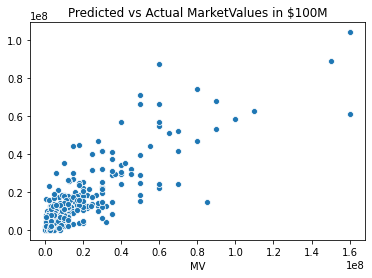

In [24]:
sns.scatterplot(y_test, preds2).set_title('Predicted vs Actual MarketValues in $100M')

In [0]:
from sklearn.metrics import r2_score

In [26]:
r2_score(y_test, preds2)

0.6662822807742662